 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [89]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [90]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending=True, inplace=True)

In [91]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [92]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [93]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending=True, inplace=True)

In [94]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [95]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [96]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_prices = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_prices.sort_index(ascending=True, inplace=True)

In [97]:
# Check Data Types
sp500_prices.dtypes

Close    object
dtype: object

In [98]:
# Fix Data Types
sp500_prices['Close'] = sp500_prices['Close'].str.replace('$','')
sp500_prices['Close'] = sp500_prices['Close'].astype('float')
sp500_prices.dtypes

Close    float64
dtype: object

In [99]:
# Calculate Daily Returns
sp500_returns = sp500_prices.pct_change()

In [100]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [101]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500_returns.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [102]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "inner")
combined_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

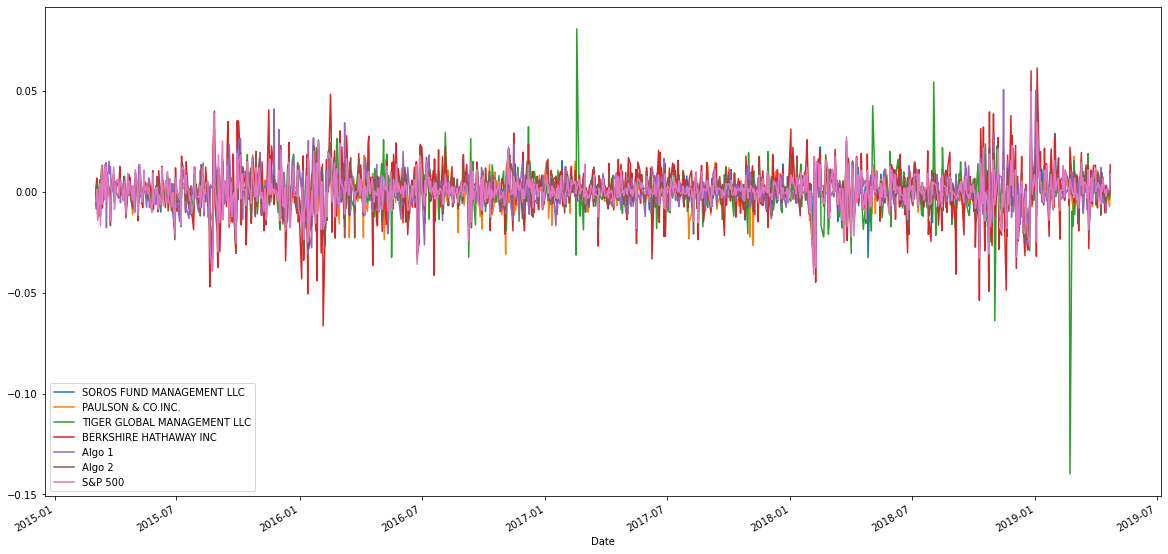

In [103]:
#Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

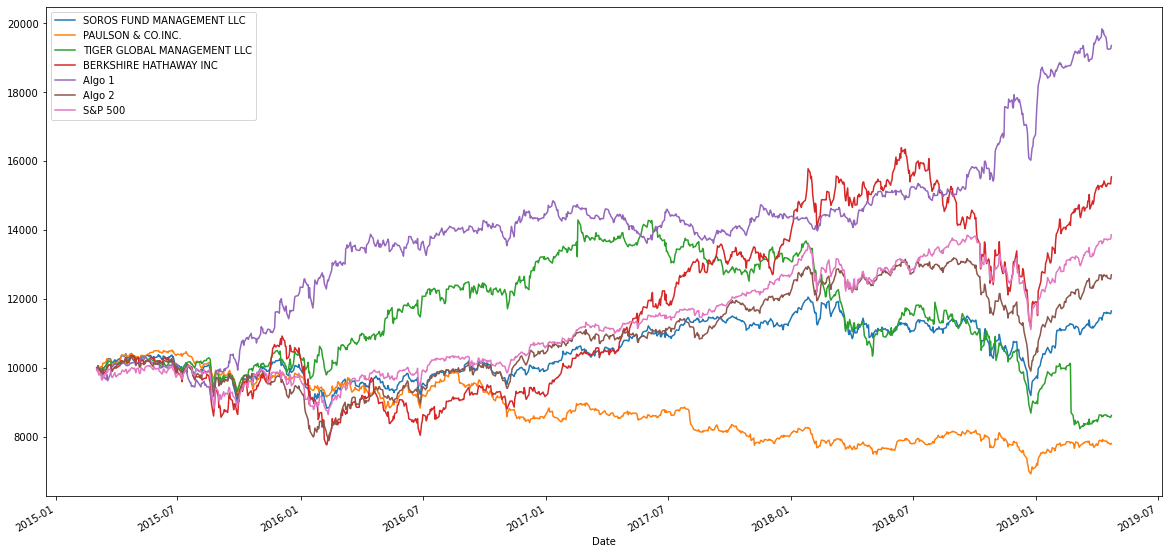

In [104]:
# Calculate cumulative returns of all portfolios
initial_investment = 10000
cum_returns = (1 + combined_returns).cumprod() * initial_investment

# Plot cumulative returns
cum_returns.plot(figsize = (20,10))

---

Only Algo 1 and Berkshire managed to outperform the S&P 500 over the time period.

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

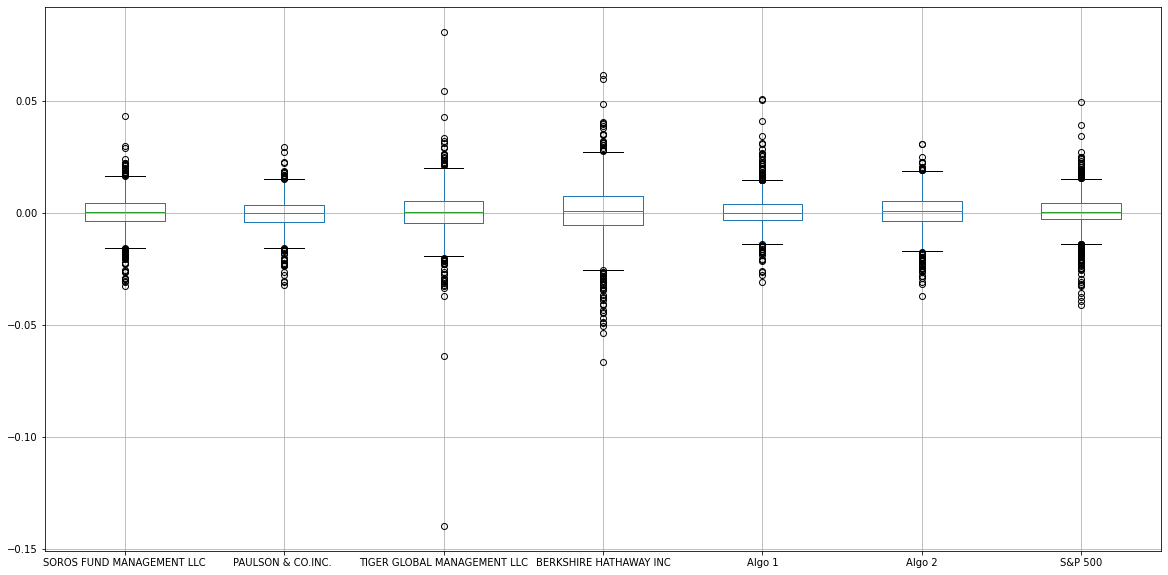

In [105]:
# Box plot to visually show risk
combined_returns.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [106]:
# Calculate the daily standard deviations of all portfolios
std_ports = combined_returns.std()
std_ports

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [107]:
# Determine which portfolios are riskier than the S&P 500
riskier = []
for i in range(0, len(std_ports)):
    if(std_ports[i] > std_ports[-1]):
        riskier.append(std_ports.keys()[i])

print(f"Portfolios riskier than the S&P 500: {(', ').join(riskier)}")

Portfolios riskier than the S&P 500: TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC


### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std_ports * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

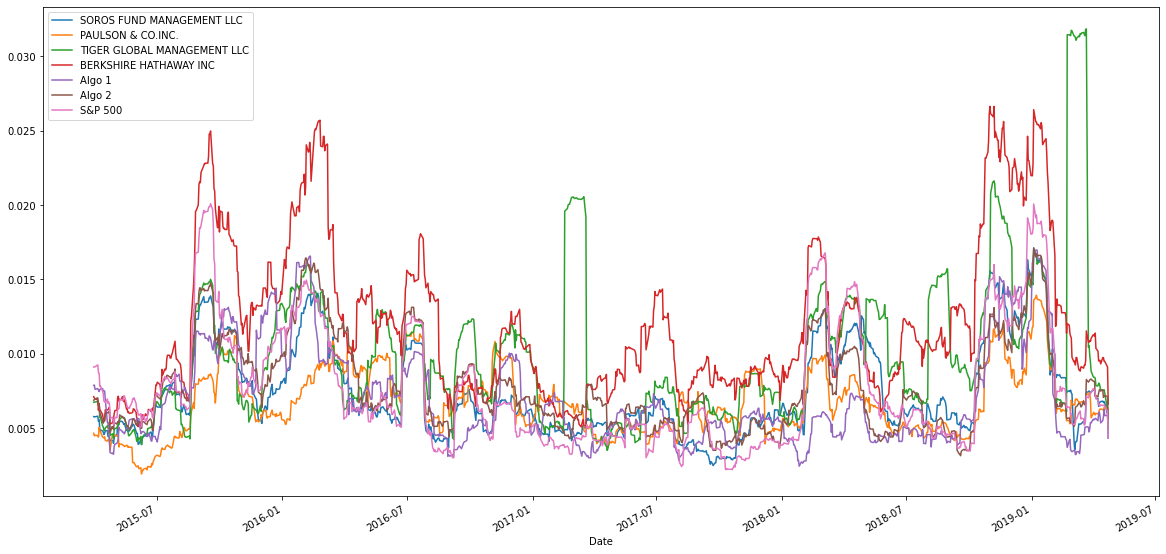

In [109]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [110]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display the correlation matrix
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P 500                      1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 and S&P 500'}, xlabel='Date'>

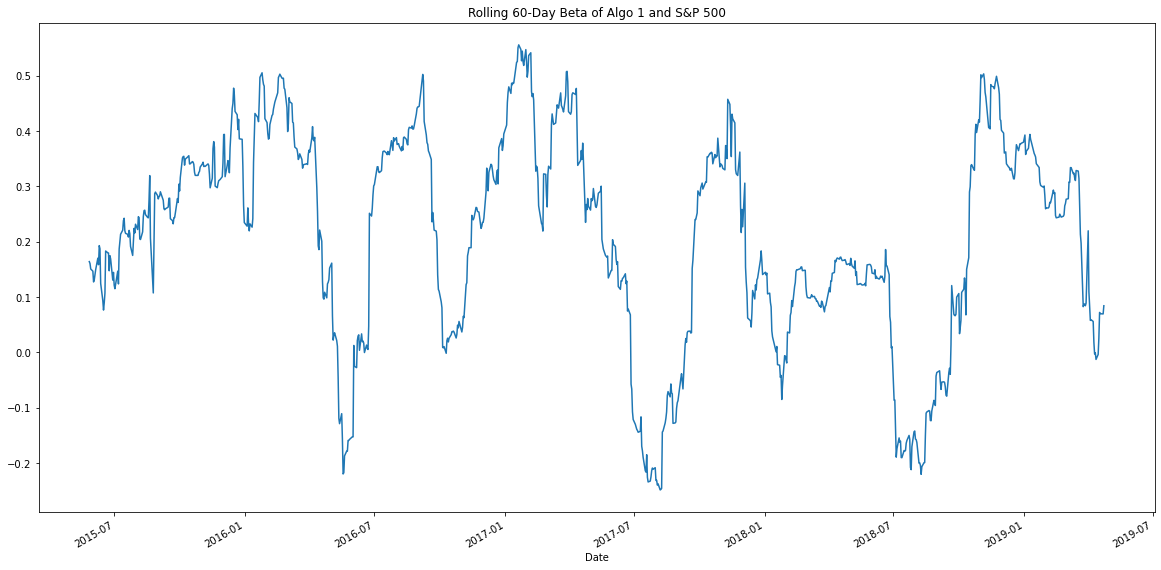

In [112]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
variance = combined_returns['S&P 500'].rolling(window=60).var()

# Computing beta
algo1_beta = algo1_covariance / variance

# Plot beta trend
algo1_beta.plot(figsize=(20,10), title = "Rolling 60-Day Beta of Algo 1 and S&P 500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [113]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife="21 days", times=combined_returns.index).mean()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000511           -0.000802   
2015-03-05                   0.001718            0.000878   
2015-03-06                  -0.000808           -0.000291   
2015-03-09                  -0.000496            0.000724   
...                               ...                 ...   
2019-04-16                   0.001649            0.000489   
2019-04-17                   0.001441            0.000171   
2019-04-18                   0.001441            0.000218   
2019-04-22                   0.001244           -0.000152   
2019-04-23                   0.001529            0.000024   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.001532               -0.001089 -0.005320   
2015-03-05                    -0.000193                0.001603 -0.003817   
2015-03-06                    -0.002369               -0.002256 -0.004116   
2015-03-09                    -0.000524               -0.002121 -0.004415   
...                                 ...                     ...       ...   
2019-04-16                    -0.000374                0.001825  0.000688   
2019-04-17                    -0.000558                0.001889  0.000186   
2019-04-18                    -0.000507                0.001890  0.000151   
2019-04-22                    -0.000660                0.001744  0.000177   
2019-04-23                    -0.000317                0.002300  0.000408   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.000761 -0.004462  
2015-03-05  0.001988 -0.002514  
2015-03-06 -0.001542 -0.005575  
2015-03-09 -0.000903 -0.003436  
...              ...       ...  
2019-04-16  0.001437  0.001489  
2019-04-17  0.001132  0.001317  
2019-04-18  0.001025  0.001329  
2019-04-22  0.000880  0.001313  
2019-04-23  0.001301  0.001676  

[1043 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [115]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:>

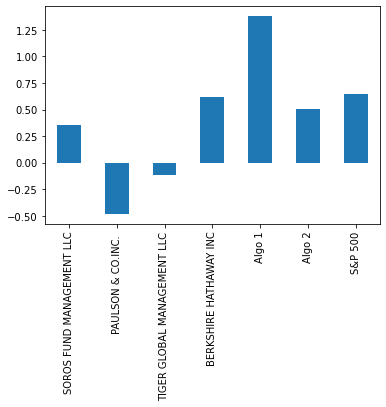

In [116]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

While Algo 1 outperforms both the market and the whales portfolios, Aglo 2 fails to outperform the market and Berkshire, while outperforming the other whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listed in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [117]:
# Reading data from 1st stock
goog_path = Path("Resources/goog_historical.csv")
goog_prices = pd.read_csv(goog_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_prices.sort_index(ascending=True, inplace=True)

In [118]:
# Reading data from 2nd stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_prices = pd.read_csv(aapl_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_prices.sort_index(ascending=True, inplace=True)

In [119]:
# Reading data from 3rd stock
cost_path = Path("Resources/cost_historical.csv")
cost_prices = pd.read_csv(cost_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_prices.sort_index(ascending=True, inplace=True)

In [120]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog_prices, aapl_prices, cost_prices], axis = "rows", join = "inner")

In [121]:
# Reset Date index
combined_stocks = combined_stocks.reset_index()
combined_stocks

Trade DATE Symbol     NOCP
0   2018-05-11   GOOG  1098.26
1   2018-05-14   GOOG  1100.20
2   2018-05-15   GOOG  1079.23
3   2018-05-16   GOOG  1081.77
4   2018-05-17   GOOG  1078.59
..         ...    ...      ...
745 2019-05-03   COST   244.62
746 2019-05-06   COST   244.23
747 2019-05-07   COST   240.18
748 2019-05-08   COST   241.34
749 2019-05-09   COST   243.47

[750 rows x 3 columns]

In [122]:
# Reorganize portfolio data by having a column per symbol
combined_stocks = combined_stocks.pivot_table(values = "NOCP", index = "Trade DATE", columns = "Symbol")
combined_stocks

Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]

In [123]:
# Calculate daily returns
daily_returns = combined_stocks.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

Symbol          AAPL      COST      GOOG
Trade DATE                              
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [124]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [125]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['Portfolio'] = portfolio_returns
combined_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500  Portfolio  
Date                                       
2015-03-03 -0.000949 -0.004539        NaN  
2015-03-04  0.002416 -0.004389        NaN  
2015-03-05  0.004323  0.001196        NaN  
2015-03-06 -0.011460 -0.014174        NaN  
2015-03-09  0.001303  0.003944        NaN  
...              ...       ...        ...  
2019-04-16  0.002899  0.000509   0.000340  
2019-04-17 -0.005228 -0.002274   0.009292  
2019-04-18 -0.001229  0.001579   0.001545  
2019-04-22 -0.001936  0.001012   0.001217  
2019-04-23  0.009622  0.008841   0.011959  

[1043 rows x 8 columns]

In [126]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)
combined_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
2018-05-18                  -0.004357           -0.002672   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   
2018-05-18                    -0.012832               -0.002212  0.002557   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500  Portfolio  
Date                                       
2018-05-14  0.001635  0.000884   0.000015  
2018-05-15 -0.001139 -0.006842  -0.010064  
2018-05-16  0.003341  0.004061   0.009403  
2018-05-17  0.005205 -0.000856  -0.001595  
2018-05-18 -0.002496 -0.002632  -0.006061  
...              ...       ...        ...  
2019-04-16  0.002899  0.000509   0.000340  
2019-04-17 -0.005228 -0.002274   0.009292  
2019-04-18 -0.001229  0.001579   0.001545  
2019-04-22 -0.001936  0.001012   0.001217  
2019-04-23  0.009622  0.008841   0.011959  

[237 rows x 8 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [127]:
# Calculate the annualized `std`
annual_std = combined_returns.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Portfolio                      0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

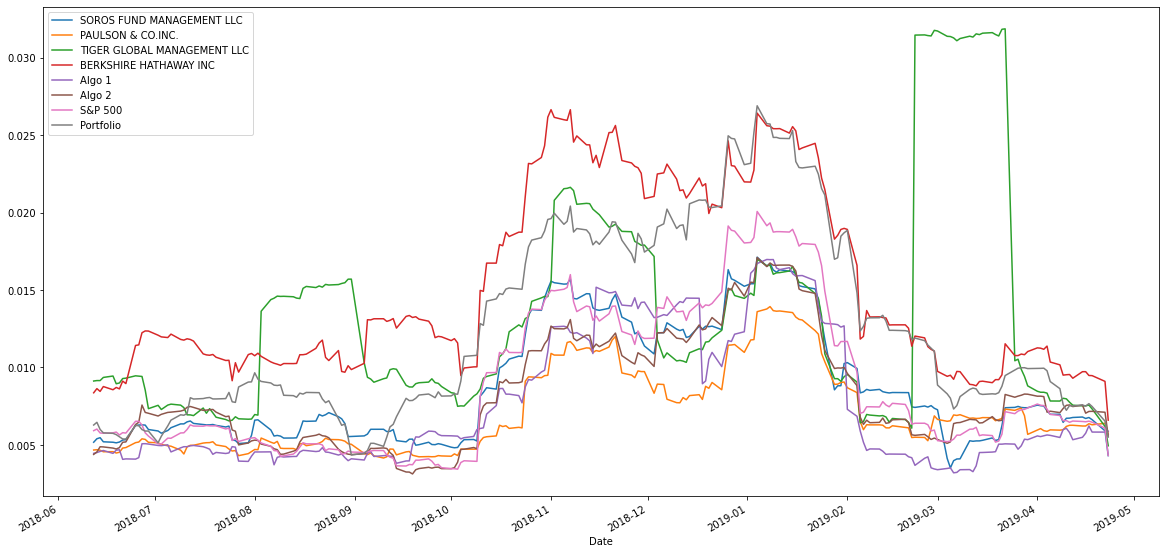

In [128]:
# Calculate rolling standard deviation
rolling_std = combined_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [129]:
# Calculate and plot the correlation
correlation = combined_returns.corr()

# Display the correlation matrix
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791962   
PAULSON & CO.INC.                             0.791962            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.478627            0.485375   
BERKSHIRE HATHAWAY INC                        0.816675            0.650758   
Algo 1                                        0.337826            0.361301   
Algo 2                                        0.862846            0.783656   
S&P 500                                       0.876981            0.766680   
Portfolio                                     0.733250            0.644210   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.478627   
PAULSON & CO.INC.                               0.485375   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.325457   
Algo 1                                          0.114554   
Algo 2                                          0.409496   
S&P 500                                         0.481030   
Portfolio                                       0.391972   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.816675  0.337826  0.862846   
PAULSON & CO.INC.                          0.650758  0.361301  0.783656   
TIGER GLOBAL MANAGEMENT LLC                0.325457  0.114554  0.409496   
BERKSHIRE HATHAWAY INC                     1.000000  0.327000  0.782804   
Algo 1                                     0.327000  1.000000  0.365512   
Algo 2                                     0.782804  0.365512  1.000000   
S&P 500                                    0.852303  0.289358  0.875721   
Portfolio                                  0.801158  0.261471  0.739936   

                              S&P 500  Portfolio  
SOROS FUND MANAGEMENT LLC    0.876981   0.733250  
PAULSON & CO.INC.            0.766680   0.644210  
TIGER GLOBAL MANAGEMENT LLC  0.481030   0.391972  
BERKSHIRE HATHAWAY INC       0.852303   0.801158  
Algo 1                       0.289358   0.261471  
Algo 2                       0.875721   0.739936  
S&P 500                      1.000000   0.871875  
Portfolio                    0.871875   1.000000

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Portfolio and S&P 500'}, xlabel='Date'>

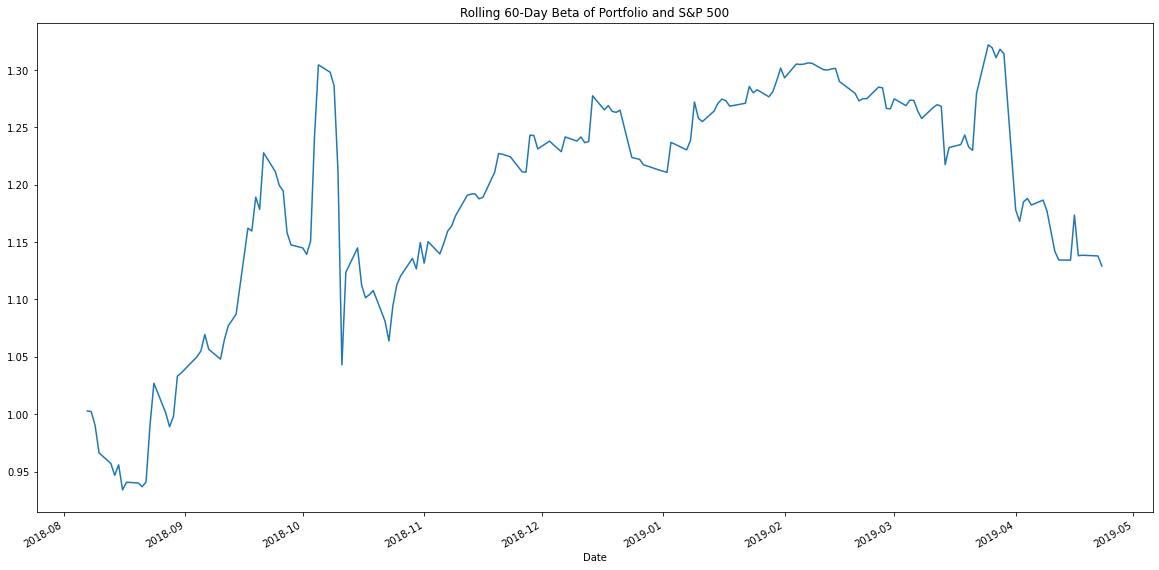

In [130]:
# Calculate and plot Beta

# Calculate covariance of the portfolio
port_covariance = combined_returns['Portfolio'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
variance = combined_returns['S&P 500'].rolling(window=60).var()

# Computing beta
port_beta = port_covariance / variance

# Plot beta trend
port_beta.plot(figsize=(20,10), title = "Rolling 60-Day Beta of Portfolio and S&P 500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [131]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:>

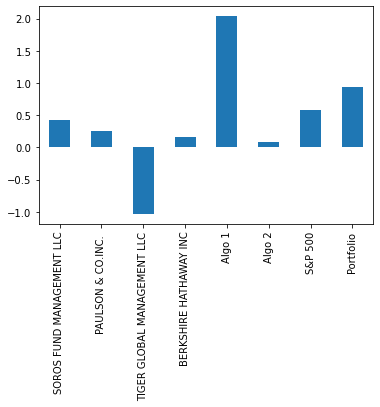

In [132]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

The simple three stock portfolio outperforms the market and all the whales portfolios, but fails to outperfrom Algo 1.